<a href="https://colab.research.google.com/github/farhanaz274/AIML_2303A51377/blob/main/Lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Trees

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline


Loading the data

In [51]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car', version=2, parser='auto')

In [52]:
type(car_data)

sklearn.utils._bunch.Bunch

In [41]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [42]:
car_data.details['version']

'2'

In [43]:
#Data the names
car_data.keys()
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [44]:
#Displaying the feature names
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [45]:
#Getting the whole dataFrame
car_data= car_data.frame
car_data.head()


,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


3- Expl;oratory analysis




<Axes: xlabel='binaryClass', ylabel='count'>

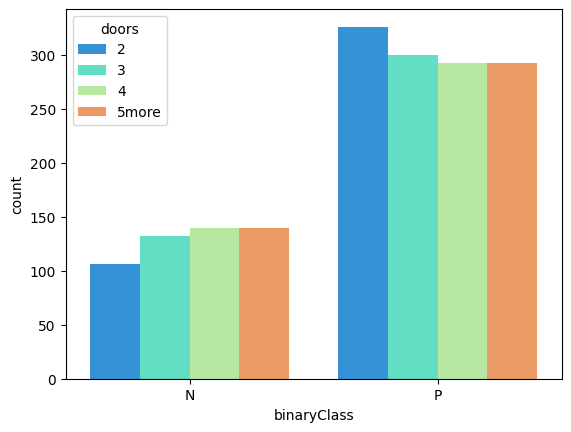

In [47]:
sns.countplot(x=car_data.binaryClass, hue="doors", data=car_data, palette="rainbow")
#sns.title("Desicion of Buying on No. of persons")
#sns.xlabel("Persons")
#sns.ylabel("count")
#sns.show()






Spilitting Data Traning and Tsts Sets

In [50]:
from sklearn.model_selection import train_test_split

train_data, test_data =train_test_split(car_data, test_size = 0.3,
                                        random_state=20)
print(f"The size of training data_is: {train_data} , testing data {test_data}")

The size of training data_is:      buying  maint  doors persons lug_boot safety binaryClass
1005    med   high      3       2      big    low           P
551    high   high      2       4    small   high           N
1334    low  vhigh      3       4    small   high           N
409   vhigh    low  5more       2      med    med           P
1682    low    low      4       2      big   high           P
...     ...    ...    ...     ...      ...    ...         ...
924     med  vhigh      4       2      big    low           P
1247    med    low      4       2      med   high           P
271   vhigh    med      4       2    small    med           P
474    high  vhigh      3       4      big    low           P
1379    low  vhigh  5more       2    small   high           P

[1209 rows x 7 columns] , testing data      buying maint  doors persons lug_boot safety binaryClass
280   vhigh   med      4       4    small    med           P
307   vhigh   med  5more       4    small    med           P
142